In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/data/wadld/")
import os
import cv2
import numpy as np
import pandas as pd
import torch
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.mixture as mixture
import sklearn.cluster as cluster
import omg
import omg.mapedit as mapedit
import copy

In [4]:
ddir = "/data/wadld/data/dataset/"
df_filename = "all_wads.pkl"
df = pd.read_pickle(os.path.join(ddir, df_filename))

In [6]:
wad_dir = "nos4dead_0" # "refinery_0"  # "pagbspd3_0/"
filename = "nos4dead.wad"# "REFINERY.WAD"# "pagbspd3.wad"
wad_path = os.path.join(ddir, wad_dir, filename)
inwad = omg.WAD()
inwad.from_file(wad_path)
del inwad

In [4]:
wad = mapedit.MapEditor(inwad.maps['E1M1'])

In [32]:
wad.linedefs[0].vx_a

2

In [15]:
lol = copy.deepcopy(wad.linedefs[0])

In [18]:
lol.vx_a = 3

In [20]:
lol.vx_a

3

In [26]:
wad.sidedefs[0].sector

0

In [27]:
wad.sectors[0]

In [228]:
from data import preprocessing as prep

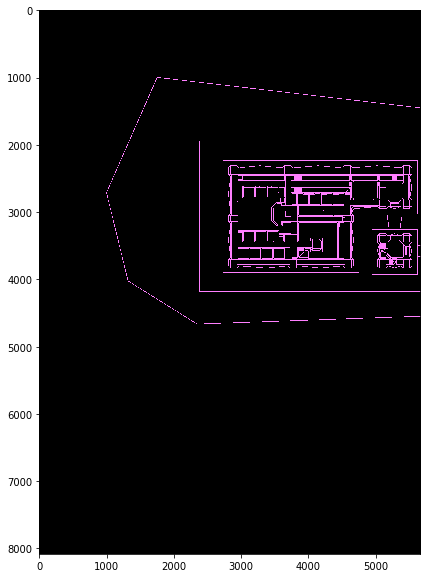

In [249]:
wad_dir = "acastle2_0/" # "refinery_0"  # "pagbspd3_0/" # "nos4dead_0/" # 
filename = "ACASTLE2.WAD"# "REFINERY.WAD"# "pagbspd3.wad" "nos4dead.wad" # 
wad_path = os.path.join(ddir, wad_dir, filename)

mapeditors = prep.load_map_editors(wad_path)
obj = mapeditors['E1M4']
img = obj.draw_linedefs(color=(1.0, 0.5, 1.0), boundary=1000)
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [250]:
wad = obj.wad

In [251]:
clusters = obj.split(4)

/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [252]:
for i in range(len(clusters)):
    enclosed = clusters[i].enclose()
    enclosed.append_to_wad("E1M4C{}".format(i))
wad.to_file("/data/wadld/output/clustered.wad")

In [248]:
obj.append_to_wad("lolol")

In [236]:
wad.maps.keys()

['E1M4', 'E1M4C0', 'E1M4C1', 'E1M4C2', 'E1M4C3']

In [211]:
lol = mapedit.Linedef()

In [213]:
lol.impassable = True

In [215]:
lol.impassable

True

In [254]:
df.votes

ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/0.zip             32
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/00_e2m8.zip       47
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/01fava.zip       122
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/01shit.zip        26
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/02what.zip        22
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/10years.zip       39
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/11bones.zip       15
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/11fortko.zip      13
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/11getbfg.zip      27
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/11inhell.zip       7
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/11nideck.zip       3
ftp://mirrors.syringanetworks.net/idgames/levels/doom/0-9/11space.zip       14
ftp://mirrors.syringanetworks.net/idgames/levels/doo